# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

1.1

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

gold = pd.read_csv('/datasets/gold_recovery_train.csv')
gold1 = pd.read_csv('/datasets/gold_recovery_test.csv')
gold2 = pd.read_csv('/datasets/gold_recovery_full.csv')
gold.info()
gold1.info()
gold2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

1.2

In [13]:
au_eff = gold[['rougher.output.concentrate_au', 'rougher.input.feed_au','rougher.output.tail_au','rougher.output.recovery']]



au_eff['rou_rec'] = ((au_eff['rougher.output.concentrate_au'] * (au_eff['rougher.input.feed_au'] - au_eff['rougher.output.tail_au'])) / (au_eff['rougher.input.feed_au'] * (au_eff['rougher.output.concentrate_au'] - au_eff['rougher.output.tail_au']))) * 100

au_eff = au_eff.dropna()

mean_absolute_error(au_eff['rougher.output.recovery'],au_eff['rou_rec'])

col = set(gold.columns) - set(gold1.columns)
col

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Получаем  ср. абсолютную ошибку на 12, что можно сказать, что расчет значение признака точно производился не от этих данных.

1.3

Отсуствуют признаки по типам продукту (output), а так же вычислительные признаки (calculation)

In [14]:
#1.4
gold.isna().sum()
gold1.isna().sum()
gold2.isna().sum()

gold = gold.dropna()
gold1 = gold1.dropna()
gold2 = gold2.dropna()

# 2. Анализ данных

([<matplotlib.axis.XTick at 0x7fd089be9450>,
 <a list of 3 Text xticklabel objects>)

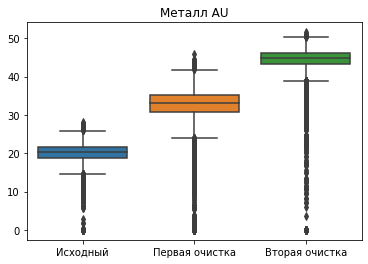

In [15]:
#2.1
sns.boxplot(data=gold[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']])
plt.title('Металл AU')
plt.xticks([0,1,2], ['Исходный', 'Первая очистка', 'Вторая очистка'])


([<matplotlib.axis.XTick at 0x7fd084b92e90>,
 <a list of 3 Text xticklabel objects>)

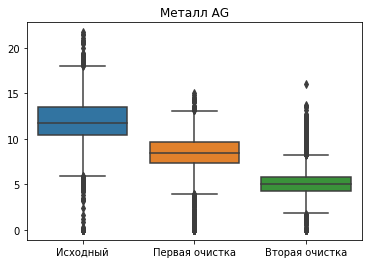

In [16]:
sns.boxplot(data=gold[['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']])
plt.title('Металл AG')
plt.xticks([0,1,2], ['Исходный', 'Первая очистка', 'Вторая очистка'])

([<matplotlib.axis.XTick at 0x7fd08a019050>,
 <a list of 3 Text xticklabel objects>)

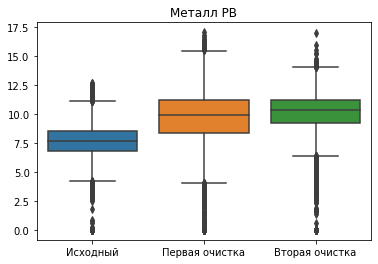

In [7]:
sns.boxplot(data=gold[['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']])
plt.title('Металл PB')
plt.xticks([0,1,2], ['Исходный', 'Первая очистка', 'Вторая очистка'])

Концентрация у AU после двух очисток увеличалась в два раза и разброс достаточной узкий, который держится в районе 45, в то время как у AG
наоборот снизилась более чем в два раза, а у PB повысилась немного на процентов 20%

Text(0.5, 0, 'гранул сырья')

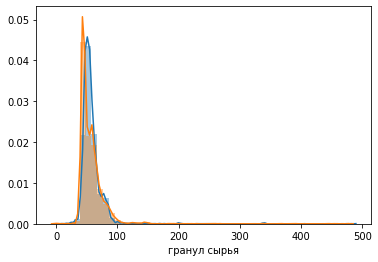

In [17]:
#2.2
sns.distplot(gold['rougher.input.feed_size'])
sns.distplot(gold1['rougher.input.feed_size'])
plt.xlabel('гранул сырья')
#распределения не сильно отличаются, можно работать дальше

Text(0.5, 0, 'кол-во')

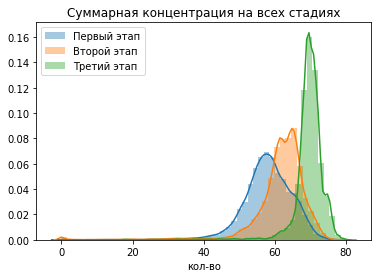

In [18]:
#2.3
gold2['one_sum'] = gold2['rougher.input.feed_ag']+gold2['rougher.input.feed_pb']+gold2['rougher.input.feed_sol']+gold2['rougher.input.feed_au']
gold2['two_sum'] = gold2['primary_cleaner.output.concentrate_ag']+gold2['primary_cleaner.output.concentrate_pb']+gold2['primary_cleaner.output.concentrate_sol']+gold2['primary_cleaner.output.concentrate_au']
gold2['three_sum'] = gold2['final.output.concentrate_ag'] + gold2['final.output.concentrate_pb'] + gold2['final.output.concentrate_sol'] + gold2['final.output.concentrate_au']

gold2 = gold2.query('two_sum > 0.005') #убрали около нулевые высокие значение (сбои)

vis = gold2[['one_sum','two_sum','three_sum']]




sns.distplot(vis['one_sum'],label = 'Первый этап')
sns.distplot(vis['two_sum'],label = 'Второй этап')
sns.distplot(vis['three_sum'], label = 'Третий этап')
plt.title('Суммарная концентрация на всех стадиях')
plt.legend()
plt.xlabel('кол-во')


Text(0.5, 0, 'кол-во')

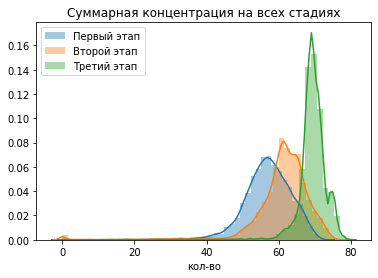

In [24]:
gold['one_sum'] = gold['rougher.input.feed_ag']+gold['rougher.input.feed_pb']+gold['rougher.input.feed_sol']+gold['rougher.input.feed_au']
gold['two_sum'] = gold['primary_cleaner.output.concentrate_ag']+gold['primary_cleaner.output.concentrate_pb']+gold['primary_cleaner.output.concentrate_sol']+gold['primary_cleaner.output.concentrate_au']
gold['three_sum'] = gold['final.output.concentrate_ag'] + gold['final.output.concentrate_pb'] + gold['final.output.concentrate_sol'] + gold['final.output.concentrate_au']

gold = gold.query('two_sum > 0.005') #убрали около нулевые высокие значение (сбои)

vis1 = gold[['one_sum','two_sum','three_sum']]




sns.distplot(vis1['one_sum'],label = 'Первый этап')
sns.distplot(vis1['two_sum'],label = 'Второй этап')
sns.distplot(vis1['three_sum'], label = 'Третий этап')
plt.title('Суммарная концентрация на всех стадиях')
plt.legend()
plt.xlabel('кол-во')


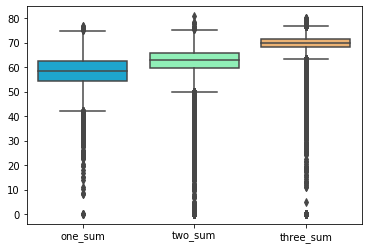

In [359]:
sns.boxplot(data=vis, palette = 'rainbow')

Аномальных значенией нет, все распределяется нормально

# 3. Модель

In [25]:
#3.1 Фукнция sMAPE

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

#Уравняем индексы, но сначала добавим целевые в тестовую
date = gold2[['date','rougher.output.recovery','final.output.recovery']]

gold1=gold1.merge(date, on='date', how='left')

gold2.set_index('date', inplace=True)
gold1.set_index('date', inplace=True)
gold.set_index('date', inplace=True)

# gold1['rougher.output.recovery'] = gold1['rougher.output.recovery'].fillna(gold1['rougher.output.recovery'].median())
# gold1['final.output.recovery'] = gold1['final.output.recovery'].fillna(gold1['final.output.recovery'].median())
gold1 = gold1.dropna()

# обернем нашу метрику, что бы ее приняла функция кросс-валидации
score = make_scorer(smape, greater_is_better=True)

In [26]:
#3.2
fet_tr_1 = gold.drop(set(gold.columns) - set(gold1.columns), axis = 1).filter(regex='^rougher',axis=1)
fet_tr_1 = fet_tr_1.drop(['rougher.output.recovery'],axis=1)
tar_tr_1 = gold['rougher.output.recovery']

fet_tr_2 = gold.drop(set(gold.columns) - set(gold1.columns), axis = 1)
fet_tr_2 = fet_tr_2.drop(['final.output.recovery','rougher.output.recovery'],axis=1)
tar_tr_2 = gold['final.output.recovery']

model_rou = LinearRegression()
model_fin = LinearRegression()

pro = pd.Series(cross_val_score(model_rou, fet_tr_1, tar_tr_1, scoring=score, cv=5)).mean()
ser = pd.Series(cross_val_score(model_fin, fet_tr_2, tar_tr_2, scoring=score, cv=5)).mean()

#Возьмем тестовую выборку
fet_test_1 = gold1[fet_tr_1.columns]
tar_test_1 = gold1['rougher.output.recovery']

fet_test_2 = gold1[fet_tr_2.columns]
tar_test_2 = gold1['final.output.recovery']


model_rou.fit(fet_tr_1,tar_tr_1)

model_fin.fit(fet_tr_2,tar_tr_2)

predict_rough = model_rou.predict(fet_test_1)
predict_fin = model_fin.predict(fet_test_2)

print('Rough SMAPE:', pro)
print('Final SMAPE:', ser)

Rough SMAPE: 9.786838003096246
Final SMAPE: 9.652551948810093


Усреднил, и вывел вместо RMSE

In [11]:
for a in range(5,10,1):
    for b in range(10,30,10):
        
        model_rou1 = RandomForestRegressor(random_state = 12345, n_estimators = b, max_depth = a)
        model_fin1 = RandomForestRegressor(random_state = 12345, n_estimators = b, max_depth = a)

        pro = pd.Series(cross_val_score(model_rou1, fet_tr_1, tar_tr_1, scoring=score, cv=5)).mean()
        ser = pd.Series(cross_val_score(model_fin1, fet_tr_2, tar_tr_2, scoring=score, cv=5)).mean()

     
        print('est:',b , 'depth:',a)
        print('cross:',pro,'-',ser)
        print('-----')

# model_rou1.fit(fet_tr_1,tar_tr_1)

# model_fin1.fit(fet_tr_2,tar_tr_2)

# predict_rough = model_rou1.predict(fet_test_1)
# predict_fin = model_fin1.predict(fet_test_2)       

est: 10 depth: 5
cross: 10.321443335029189 - 9.44823052903498
-----
est: 20 depth: 5
cross: 10.141098696404338 - 9.514858265831695
-----
est: 10 depth: 6
cross: 10.62491600406803 - 9.83324047446498
-----
est: 20 depth: 6
cross: 10.439664952551194 - 9.654395732487655
-----
est: 10 depth: 7
cross: 11.000384626338917 - 10.050445364214179
-----
est: 20 depth: 7
cross: 10.796695987202895 - 10.02708490089444
-----
est: 10 depth: 8
cross: 11.086197767672434 - 10.580529873374577
-----
est: 20 depth: 8
cross: 10.942115087288244 - 10.382630742635142
-----
est: 10 depth: 9
cross: 11.593092899932714 - 10.844564530648508
-----
est: 20 depth: 9
cross: 11.400713297852784 - 10.55912877648693
-----


Так же усреднил и лучшая модель все равно выходит у линейной регрессии, ее и берем

In [29]:
#SMAPE
from sklearn.dummy import DummyRegressor

smape_rough = smape(predict_rough,tar_test_1)
smape_fin = smape(predict_fin,tar_test_2)

smape_final = smape_rough * 0.25 + smape_fin * 0.75

dummy_regr_1 = DummyRegressor(strategy="median")
dummy_regr_2 = DummyRegressor(strategy="median")
dummy_regr_1.fit(fet_tr_1,tar_tr_1)
dummy_regr_2.fit(fet_tr_2,tar_tr_2)

predict_rough_dr = dummy_regr_1.predict(fet_test_1)
predict_fin_dr = dummy_regr_2.predict(fet_test_2)

smape_rough_1 = smape(predict_rough_dr, tar_test_1)
smape_fin_1 = smape(predict_fin_dr, tar_test_2)

smape_dr = smape_rough_1 * 0.25 + smape_fin_1 * 0.75



print('SMAPE',smape_final)
print('DR:', smape_dr)

SMAPE 8.22128367466619
DR: 8.511141687374291
